In [3]:
from sim.simulator import Simulator
from model.agent import Agent

In [166]:
sim = Simulator(Agent(idle_reward=0), '20161102', order_limit=None)

Initializing drivers
35272 drivers initialized
Initializing orders
271450 orders initialized


In [167]:
sim.run()

100%|██████████| 271k/271k [27:20<00:00, 165 orders/s, d_busy=1228, d_online=1366, d_score=6.82e+5, o_cancelled=16463, o_fulfilled=167185, o_unfulfilled=19068]  

Run time: 1641.00 sec
Dispatch score: 682249.9400
Reposition score: 0.0015
Completed orders: 0.82 | Cancelled orders: 0.08 | Unfulfilled orders: 0.09


{'dispatch_score': 682249.9399999616,
 'reposition_score': 0.0014726610481045881,
 'orders_completed': 0.8247066193771797,
 'orders_cancelled': 0.08120933490526482,
 'orders_unfulfilled': 0.09408404571755548}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dfs = []
for i in range(20161101, 20161131):
    df = pd.read_parquet(f'data/processed/orders/{i}.parquet')
    dfs.append(df)
    
df = pd.concat(dfs)

In [3]:
df.size

80900532

In [4]:
from sim.grid import Grid
import matplotlib

### Order density

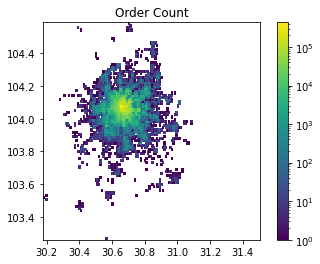

In [5]:
plt.hist2d(df.pickup_lat, df.pickup_lng, norm=matplotlib.colors.LogNorm(), bins=100)
plt.axis('square')
plt.colorbar()
plt.title('Order Count')
plt.show()

### Reward density

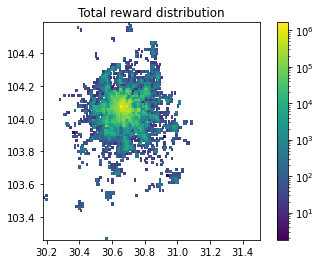

In [6]:
plt.hist2d(df.pickup_lat, df.pickup_lng, weights=df.reward, norm=matplotlib.colors.LogNorm(), bins=100)
plt.axis('square')
plt.colorbar()
plt.title('Total reward distribution')
plt.show()

### Reward per order

/code/venvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


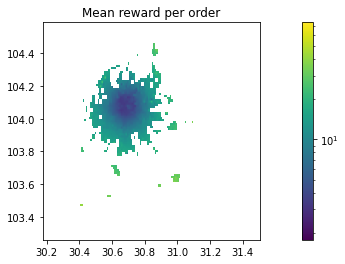

In [7]:
h, xedges, yedges = np.histogram2d(df.pickup_lat, df.pickup_lng, weights=df.reward, bins=100)

h_cnt, xedges, yedges = np.histogram2d(df.pickup_lat, df.pickup_lng, bins=100)

plt.figure()
plt.imshow((h/h_cnt).T, norm=matplotlib.colors.LogNorm(), origin='lowr', extent=[min(xedges), max(xedges), min(yedges), max(yedges)])
plt.colorbar()
plt.axis('square')
plt.title('Mean reward per order')
plt.show()

### Cancel probability (at 200m)

/code/venvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


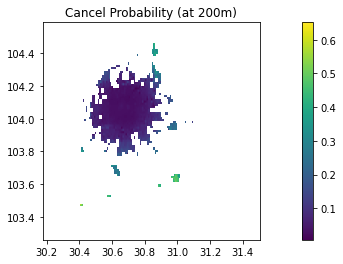

In [8]:
h, xedges, yedges = np.histogram2d(df.pickup_lat, df.pickup_lng, weights=df.cancel_prob.apply(lambda x: x[0]), bins=100)

h_cnt, xedges, yedges = np.histogram2d(df.pickup_lat, df.pickup_lng, bins=100)

plt.figure()
plt.imshow((h/h_cnt).T, origin='lower', extent=[min(xedges), max(xedges), min(yedges), max(yedges)])
plt.colorbar()
plt.axis('square')
plt.title('Cancel Probability (at 200m)')
plt.show()

### Cancel probability (at 2000m)

/code/venvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


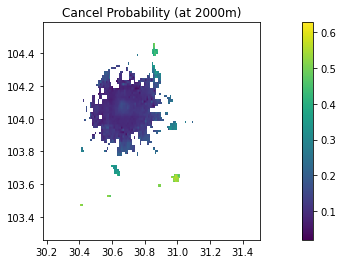

In [9]:
h, xedges, yedges = np.histogram2d(df.pickup_lat, df.pickup_lng, weights=df.cancel_prob.apply(lambda x: x[-1]), bins=100)

h_cnt, xedges, yedges = np.histogram2d(df.pickup_lat, df.pickup_lng, bins=100)

plt.figure()
plt.imshow((h/h_cnt).T, origin='lower', extent=[min(xedges), max(xedges), min(yedges), max(yedges)])
plt.colorbar()
plt.axis('square')
plt.title('Cancel Probability (at 2000m)')
plt.show()

In [10]:
from sim.geo import local_projection_distance

lat_center = df.pickup_lat.median()
lng_center = df.pickup_lng.median()

dist = local_projection_distance(lat_center, lng_center, df.pickup_lat, df.pickup_lng)

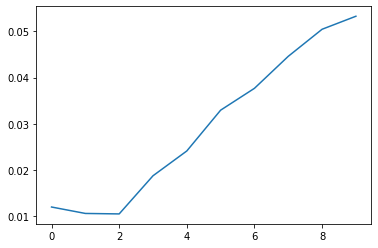

In [11]:
plt.plot(df.sample(1).iloc[0].cancel_prob)

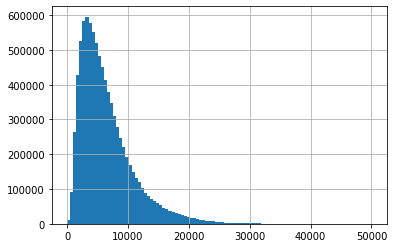

In [12]:
local_projection_distance(df.pickup_lat, df.pickup_lng, df.dropoff_lat, df.dropoff_lng).hist(bins=np.linspace(0, 50000, 100))

(0.0, 0.1)

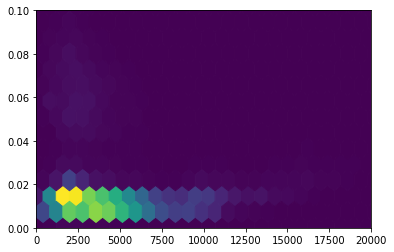

In [13]:
plt.hexbin(dist, df.cancel_prob.apply(lambda x: x[0]))
plt.xlim([0, 20000])
plt.ylim([0, 0.1])

In [14]:
df.head()

,order_id,start_time,stop_time,pickup_lng,pickup_lat,dropoff_lng,dropoff_lat,reward,cancel_prob
0,eb9dd4095d9850e6287cefd813775a6c,1477964797,1477966507,104.094640,30.703971,104.08927,30.65085,3.54,"[0.008606, 0.008098000000000001, 0.008355, 0.0..."
1,eb9dd4095d9850e6287cefd813775a6c,1477964797,1477966507,104.094640,30.703971,104.08927,30.65085,3.54,"[0.008606, 0.008098000000000001, 0.008355, 0.0..."
2,eb9dd4095d9850e6287cefd813775a6c,1477964797,1477966507,104.094640,30.703971,104.08927,30.65085,3.54,"[0.008606, 0.008098000000000001, 0.008355, 0.0..."
3,eb9dd4095d9850e6287cefd813775a6c,1477964797,1477966507,104.094640,30.703971,104.08927,30.65085,3.54,"[0.008606, 0.008098000000000001, 0.008355, 0.0..."
4,387a742fa5a3fbe4a1f215ac58ea33a8,1477985585,1477987675,104.076509,30.767430,104.06370,30.58951,11.70,"[0.11786400000000001, 0.126627, 0.134129, 0.14..."


In [15]:
from datetime import datetime

datetime.utcfromtimestamp(1477964797)

datetime.datetime(2016, 11, 1, 1, 46, 37)

In [16]:
hour_of_day = df.start_time.apply(lambda x: datetime.utcfromtimestamp(x).hour)

In [138]:
from sim.geo import local_projection_distance

lat_center = df.pickup_lat.median()
lng_center = df.pickup_lng.median()

dist = local_projection_distance(lat_center, lng_center, df.pickup_lat, df.pickup_lng)

x = dist
y = df.cancel_prob.apply(lambda x: x[0])

# x = x[hour_of_day == 12]
# y = y[hour_of_day == 12]

In [162]:
bins = np.linspace(0, 20000, 5000)
hist, bin_edges = np.histogram(x, weights=y, bins=bins)
hist_count, _ = np.histogram(x, bins=bins)

x_agg = bin_edges[:-1]  # Use left bin edge as x value
y_agg = hist/hist_count

/code/venvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


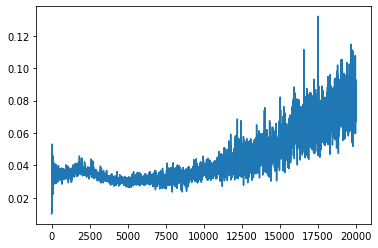

In [163]:
plt.plot(bin_edges[:-1], y_agg)

/code/venvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


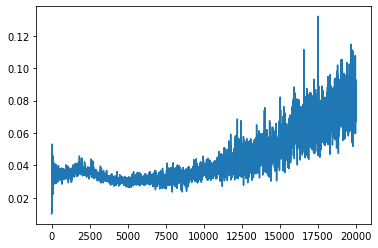

In [164]:
plt.plot(bin_edges[:-1], hist/hist_count)

Text(0, 0.5, 'Cancel prob')

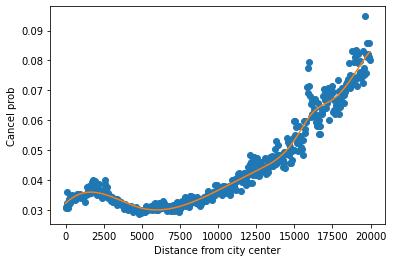

In [142]:
from scipy import interpolate

spl = interpolate.UnivariateSpline(bin_edges[:-1], y_agg, s=0.004)

plt.plot(x_agg, y_agg, 'o')
plt.plot(x_agg, spl(bin_edges[:-1]))
plt.xlabel('Distance from city center')
plt.ylabel('Cancel prob')


In [83]:
from sim.geo import local_projection_distance

lat_center = df.pickup_lat.median()
lng_center = df.pickup_lng.median()

dist = local_projection_distance(lat_center, lng_center, df.pickup_lat, df.pickup_lng)

x = dist

y = []
for i in range(0, 10):
    y.append(df.cancel_prob.apply(lambda x: x[i]).values)
    
y = np.array(y)

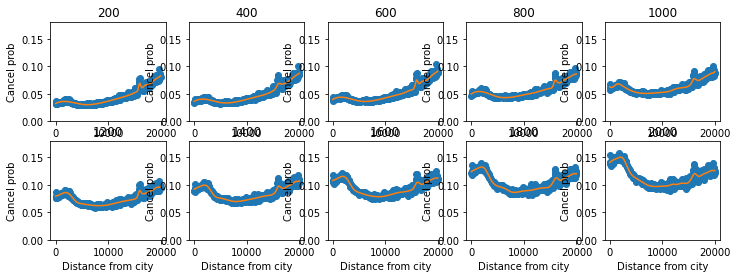

In [122]:
smoothing = [0.003, 0.004, 0.004, 0.004, 0.004, 0.004, 0.005, 0.006, 0.007, 0.008]
bins = np.linspace(0, 20000, 500)

plt.figure(figsize=(12, 4))

splines = []
for i in range(0, 10):
    hist, bin_edges = np.histogram(x, weights=y[i, :], bins=bins)
    hist_count, _ = np.histogram(x, bins=bins)

    x_agg = bin_edges[:-1]  # Use left bin edge as x value
    y_agg = hist/hist_count
    
    spl = interpolate.UnivariateSpline(x_agg, y_agg, s=smoothing[i])
    splines.append(spl)
    
    # Plot
    plt.subplot(2, 5, i+1)
    
    plt.plot(x_agg, y_agg, 'o')
    plt.plot(x_agg, spl(bin_edges[:-1]))
    plt.xlabel('Distance from city')
    plt.ylabel('Cancel prob')
    plt.ylim([0.0, 0.18])
    plt.title(f'{(i+1)*200}')


import pickle

with open('cancel_splines.pkl', 'wb') as f:
    pickle.dump(splines, f)

Text(0, 0.5, 'Cancel prob')

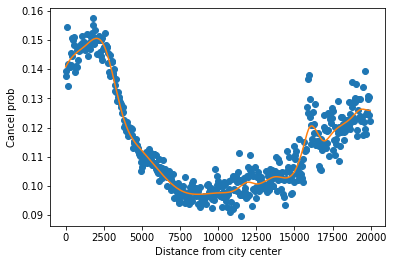

In [115]:
from scipy import interpolate

spl = interpolate.UnivariateSpline(bin_edges[:-1], y_agg, s=0.008)

plt.plot(x_agg, y_agg, 'o')
plt.plot(x_agg, spl(bin_edges[:-1]))
plt.xlabel('Distance from city center')
plt.ylabel('Cancel prob')


In [158]:
# These are the median pickup lat/lng from all available historical order data
LAT_CENTER = 30.67135
LNG_CENTER = 104.073643

def distance_from_city_center(lat, lng):
    return local_projection_distance(LAT_CENTER, LNG_CENTER, lat, lng)


In [175]:
def load_cancel_splines():
    with open ('cancel_splines.pkl', 'rb') as f:
        return pickle.load(f)
    
CANCEL_PROB_DISTANCES = list(range(200, 2001, 200))
MAX_SPLINE_DISTANCE = 20000

def cancel_probability(order_driver_distance, pickup_lat, pickup_lng):
    if order_driver_distance > MAX_SPLINE_DISTANCE:
        # Fallback to original method
        pass
    
    city_dist = distance_from_city_center(pickup_lat, pickup_lng)
    print(city_dist)
    cancel_probs = [spl(city_dist) for spl in splines]
    
    f = interpolate.interp1d(CANCEL_PROB_DISTANCES, cancel_probs)
    return f(order_driver_distance)

In [188]:
df.sample(5)

,order_id,start_time,stop_time,pickup_lng,pickup_lat,dropoff_lng,dropoff_lat,reward,cancel_prob
190704,2caec13eed36a67c32ca3902d0a4c573,1478760966,1478762799,104.076750,30.689370,104.01371,30.705230,4.47,"[0.014025, 0.013558, 0.014516999999999999, 0.0..."
233587,e7b51519ef34449770f7a04e4d01ee9c,1480416198,1480419419,103.944698,30.602300,104.07872,30.675760,10.71,"[0.2917, 0.306211, 0.31250300000000003, 0.2921..."
204576,18f9fa118a5421cd2eba6f4d01c4e813,1478306996,1478309167,104.094130,30.695580,103.96199,30.751680,8.12,"[0.016321000000000002, 0.017211, 0.017813, 0.0..."
270236,b5c8ce7216be9f21aacb90134763d5ea,1479013515,1479015040,103.994488,30.758659,104.04663,30.691430,4.66,"[0.012762, 0.012303, 0.012429, 0.018441, 0.025..."
291517,655d2222137b35c2696077a95247a3f9,1480294490,1480294978,104.062988,30.688597,104.07027,30.675839,1.80,"[0.108956, 0.122243, 0.13080899999999998, 0.16..."


In [193]:
dist_query = 1100
cancel_probability(dist_query, 30.689370, 104.076750)

2019.8423337814486


array(0.07625688)

In [194]:
def cancel_probability_old(order_driver_distance):
    """Determined in cancel_prob.ipynb
    This technically goes above 100% starting at 7599 m. Doesn't cause any critical issues though, so we'll save on
    compute by NOT doing max(cancel_prob, 1.0)
    """
    return 1 / (np.exp(4.39349586 - 0.00109042 * order_driver_distance) + 1) + 0.02

cancel_probability_old(dist_query)

0.05939085751680058